# Choose a Data Set
Pick one of the following data sets to analyze for your final project. 
- [Cosmetics](https://drive.google.com/drive/folders/1qvmRfGb7a_pYAtgW6614gxlP-bxl_Ptz?usp=drive_link)
- [Mental Health](https://drive.google.com/drive/folders/1YOp1aQVcmqlAkUEGHNPl_TyNXbY-xHwO?usp=drive_link)
- [Pokemon](https://drive.google.com/drive/folders/1kDu2oRgm_hUW5hdM0tHnMUqCGSKUYT1v?usp=drive_link)
- [Ramen](https://drive.google.com/drive/folders/1Y4_5QHOCy8rHc5EsEwDUuoCfp2WLo-MN?usp=drive_link)
- [Student Performance](https://drive.google.com/drive/folders/1fE31Ka38AnGpgfI_Es3z4psuA0phhH0Y?usp=drive_link)

# My Question

How does the amount of physical activity influence mental health and the various factors that affect it?

# My Analysis

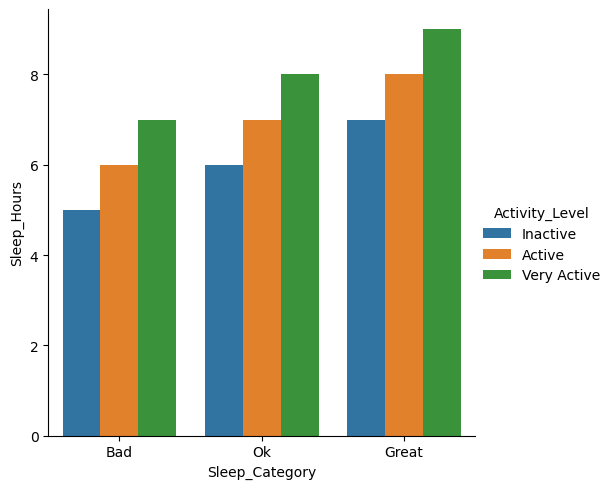

In [17]:
# Analysis Techniques Used: Bar Charts, Histogram, Mean (Average)

# Libraries
import pandas as pd
import seaborn as sb
import numpy as np

df = pd.read_csv('mentalhealth.csv')

# Data Processing
#df['Physical_Activity_Hours'] = np.ceil(df['Physical_Activity_Hours'])

inactive = df[(df['Physical_Activity_Hours'] >= 0) & (df['Physical_Activity_Hours'] <=3)]
active = df[(df['Physical_Activity_Hours'] > 3) & (df['Physical_Activity_Hours'] <= 6)]
very_active = df[(df['Physical_Activity_Hours'] > 6)]

# Analysis
pa_mhCont = pd.DataFrame({ # Excellent, Good, Fair, Poor
    "Semi-Active (0-3 hrs)": [len(inactive[(inactive['Mental_Health_Status'] == "Excellent")]), 
                              len(inactive[(inactive['Mental_Health_Status'] == "Good")]), 
                              len(inactive[(inactive['Mental_Health_Status'] == "Fair")]),
                              len(inactive[(inactive['Mental_Health_Status'] == "Poor")]),
                             (len(inactive[(inactive['Mental_Health_Status'] == "Excellent") | (inactive['Mental_Health_Status'] == "Good")]) / len(inactive)) * 100,
                             (len(inactive[(inactive['Mental_Health_Status'] == "Fair") | (inactive['Mental_Health_Status'] == "Poor")]) / len(inactive)) * 100],
    "Active (4-6 hrs)": [len(active[(active['Mental_Health_Status'] == "Excellent")]),
                    len(active[(active['Mental_Health_Status'] == "Good")]),
                    len(active[(active['Mental_Health_Status'] == "Fair")]),
                    len(active[(active['Mental_Health_Status'] == "Poor")]),
                    (len(active[(active['Mental_Health_Status'] == "Excellent") | (active['Mental_Health_Status'] == "Good")]) / len(active)) * 100,
                    (len(active[(active['Mental_Health_Status'] == "Fair") | (active['Mental_Health_Status'] == "Poor")]) / len(active)) * 100],
    "Very Active (7-10 hrs)": [len(very_active[(very_active['Mental_Health_Status'] == "Excellent")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Good")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Fair")]),
                    len(very_active[(very_active['Mental_Health_Status'] == "Poor")]),
                    (len(very_active[(very_active['Mental_Health_Status'] == "Excellent") | (very_active['Mental_Health_Status'] == "Good")]) / len(very_active)) * 100,
                    (len(very_active[(very_active['Mental_Health_Status'] == "Fair") | (very_active['Mental_Health_Status'] == "Poor")]) / len(very_active)) * 100],

})
pa_mhCont.index=['Excellent (Mental Health)', 'Good', 'Fair', 'Poor', "Good Mental Health (%) (Excellent-Good)", "Poor Mental Health (%) (Fair-Poor)"]

pa_s = pd.DataFrame({
    'Activity Level': ['Semi-Active (0-3 hrs)', 'Active (4-6 hrs)', 'Very Active (7-10 hrs)'],
    'Mean Sleep Hours': [inactive['Sleep_Hours'].mean(), active['Sleep_Hours'].mean(), very_active['Sleep_Hours'].mean()]
})

#pa_mhCont
#sb.barplot(x='Activity Level', y='Mean Sleep Hours', data=pa_s)
data = {
    'Sleep_Category': ['Bad', 'Bad', 'Bad', 'Ok', 'Ok', 'Ok', 'Great', 'Great', 'Great'],
    'Activity_Level': ['Inactive', 'Active', 'Very Active', 'Inactive', 'Active', 'Very Active', 'Inactive', 'Active', 'Very Active'],
    'Sleep_Hours': [5, 6, 7, 6, 7, 8, 7, 8, 9]
}

dfs = pd.DataFrame(data)

sb.catplot(
    data=dfs,
    x='Sleep_Category',
    y='Sleep_Hours',
    hue='Activity_Level',
    kind='bar'
)

# My Answer

There is no direct/noticeable correlation between physical activity and one’s mental health, as both good and bad mental health are relatively consistent in making up half of their respective samples (semi-active, active, and very active).

